# ASSIGNEMENT NO. 7 ( Clustering )

### <FONT COLOR = RED > Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

## Hierarchical Clustering

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# importing data 
data=pd.read_csv("EastWestAirlines.csv")

In [3]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.shape

(3999, 12)

In [6]:
data = data.dropna()
data.shape

(3999, 12)

In [7]:
#Normalize Data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
df_norm = norm_func(data.iloc[:,1:])

In [9]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data1 = pd.DataFrame(trans.fit_transform(data.iloc[:,1:]))
data1

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


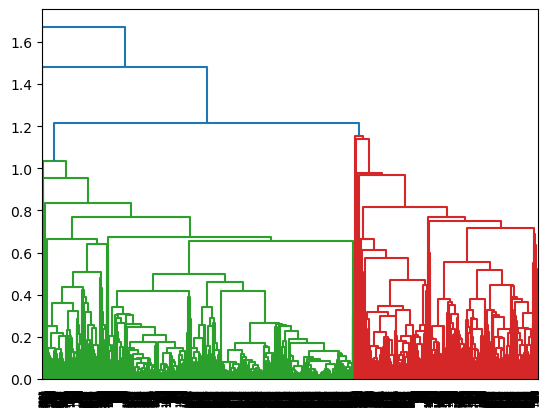

In [10]:
# Create Dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm,method="average"))

In [11]:
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")

In [12]:
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc,columns=["Clusters"])
df_norm["h_clusterid"]=Clusters
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


In [13]:
df_norm.iloc[:,1:].groupby(df_norm.h_clusterid).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,
0,0.021580,0.414169,0.007834,0.000170,0.107487,0.180779,0.026094,0.046450,0.557646,1.0,0.0
1,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0,1.0
2,0.000000,0.000000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,2.0
3,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.0,3.0
4,0.013253,0.718750,0.000000,0.812500,0.437163,0.351744,0.019470,0.037736,0.618022,1.0,4.0


In [14]:
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average").fit(df_norm)
cluster_labels = pd.Series(hc.labels_)
data["clus"] = cluster_labels
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clus
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [15]:
data.iloc[:,1:].groupby(data.clus).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clus
clus,,,,,,,,,,,,
0,9.597426e+04,240.572888,2.656676,1.015668,1.000681,28342.702997,15.547003,804.152589,2.461853,4627.118529,1.0,0.0
1,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.0
2,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,2.0
3,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0,3.0
4,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,4.0


## K-Means Clustering

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [17]:
data=pd.read_csv("EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
# Normalizing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])
scaled_data_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [19]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    if i > 6:
        break
wcss

[43989.000000000015,
 35409.51145242436,
 30899.246824652197,
 27446.37245668138,
 24541.329582045775,
 21089.973628929645,
 19165.861458655665]

Text(0, 0.5, 'WCSS')

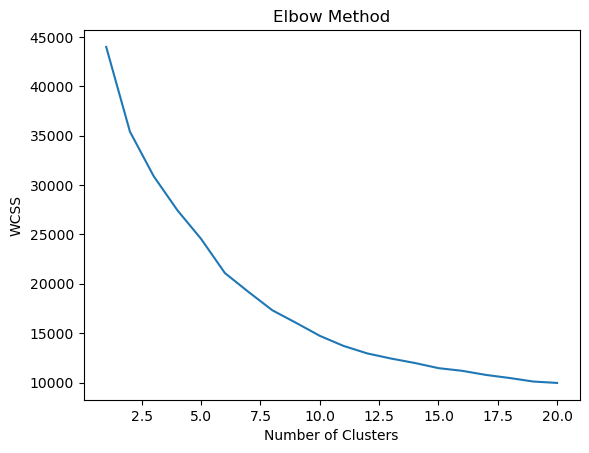

In [20]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,21),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [21]:
# Building Algorithm
clusters_new = KMeans(n_clusters=10,random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=10, random_state=42)

In [22]:
clusters_new.labels_

array([8, 8, 8, ..., 1, 3, 3])

In [23]:
# Assign clusters to data set
data["n_clusterid"]=clusters_new.labels_
clusters_new.cluster_centers_

array([[ 1.76086093e-01, -7.29497315e-02,  1.52733148e+00,
        -9.82418871e-02, -5.31014450e-02,  1.35917979e+00,
         9.37047324e-01, -2.75673730e-04,  1.34297279e-02,
         4.52571785e-01,  1.26484575e+00],
       [-1.60958695e-01, -6.06089184e-02, -3.15017914e-01,
        -9.82418871e-02, -6.27665798e-02, -3.00874995e-01,
        -1.59759060e-01, -2.80024574e-02, -1.70320199e-02,
         4.24293720e-02,  1.30391816e+00],
       [ 5.63881903e-01,  4.07768771e-01,  4.57121707e-02,
        -9.82418871e-02, -6.27665798e-02,  5.86359904e-01,
         1.88088091e+00,  4.52938340e+00,  4.66360110e+00,
         1.21854310e-01,  8.17905286e-01],
       [-4.18682747e-01, -1.37973510e-01, -6.97525671e-01,
        -9.82418871e-02, -6.27665798e-02, -5.86466620e-01,
        -6.17494213e-01, -2.19106211e-01, -2.42488475e-01,
        -1.03433450e+00, -7.66919299e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [24]:
data.groupby("n_clusterid").agg(["mean"]).reset_index()

,n_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1499.141509,91344.301887,87.683019,4.162264,1.000000,1.001887,49966.249057,20.600000,459.669811,1.424528,5053.064151,0.981132
1,1,1972.808344,57382.636245,97.229465,1.625815,1.000000,1.000000,9879.332464,10.067797,420.851369,1.308996,4206.170795,1.000000
2,2,1886.938776,130419.795918,459.551020,2.122449,1.000000,1.000000,31304.234694,29.663265,6801.346939,19.061224,4370.173469,0.765306
3,3,3200.675351,31413.571142,37.382766,1.099198,1.000000,1.000000,2982.880762,5.672345,153.299599,0.453908,1982.786573,0.000000
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,6,2080.963636,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
7,7,1860.109091,109019.472727,16.646281,3.414876,1.000000,1.001653,28706.335537,17.616529,183.021488,0.520661,4407.391736,0.000000
8,8,1151.723798,47469.530210,35.377312,1.113440,1.000000,1.001233,3059.090012,6.082614,179.519112,0.537608,5620.505549,0.000000


In [25]:
data[data["n_clusterid"]==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,n_clusterid
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,0
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,0
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,0
3930,3953,40424,0,4,1,1,44110,26,343,3,1523,1,0


## DBSCAN Clustering

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [27]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,n_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,8
1,2,19244,0,1,1,1,215,2,0,0,6968,0,8
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,8
3,4,14776,0,1,1,1,500,1,0,0,6952,0,8
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [28]:
data.drop(["ID#"],axis=1,inplace=True)

In [29]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,n_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,8
1,19244,0,1,1,1,215,2,0,0,6968,0,8
2,41354,0,1,1,1,4123,4,0,0,7034,0,8
3,14776,0,1,1,1,500,1,0,0,6952,0,8
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,3


In [30]:
array = data.values
array

array([[28143,     0,     1, ...,  7000,     0,     8],
       [19244,     0,     1, ...,  6968,     0,     8],
       [41354,     0,     1, ...,  7034,     0,     8],
       ...,
       [73597,     0,     3, ...,  1402,     1,     1],
       [54899,     0,     1, ...,  1401,     0,     3],
       [ 3016,     0,     1, ...,  1398,     0,     3]], dtype=int64)

In [31]:
# Normalizing data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(array)
scaled_data_df = scaler.transform(array)
scaled_data_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  1.31255445e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01,  1.31255445e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01,  1.31255445e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -9.77829337e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -3.23433970e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -3.23433970e-01]])

In [32]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

In [33]:
neighbors = NearestNeighbors(n_neighbors=10).fit(scaled_data_df)
distances, indices = neighbors.kneighbors(scaled_data_df)

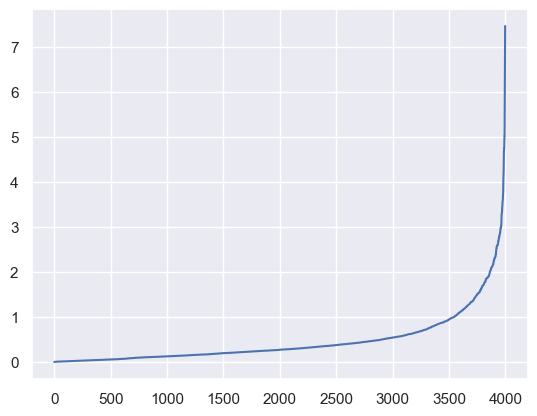

In [34]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [35]:
#Building ModeL
dbscan = DBSCAN(eps=2.4, min_samples=9)
dbscan.fit(scaled_data_df)

DBSCAN(eps=2.4, min_samples=9)

In [36]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
cl = pd.DataFrame(dbscan.labels_,columns=["Cluster"])
cl

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [38]:
import sklearn
sklearn.metrics.silhouette_score(scaled_data_df,dbscan.labels_)

0.512110160439796

In [39]:
pd.concat([data,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,n_clusterid,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,8,0
1,19244,0,1,1,1,215,2,0,0,6968,0,8,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,8,0
3,14776,0,1,1,1,500,1,0,0,6952,0,8,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,3,0


# ===============================================================

### <font color =red> Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences

## Hierarchical Clustering

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [41]:
data = pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [42]:
#Normalize data function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [43]:
#Normalize Data Frame
df_norm = norm_func(data.iloc[:,1:])

In [44]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data1= pd.DataFrame(trans.fit_transform(data.iloc[:,1:]))
data1


,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [45]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


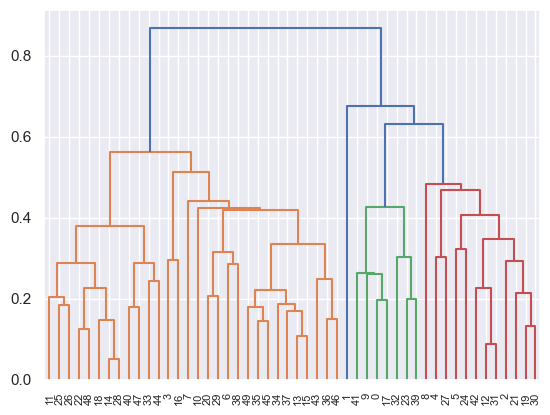

In [46]:
#DRAW DENDROGRAM 
dendrogram = sch.dendrogram(sch.linkage(df_norm,method="average"))

In [47]:
#CLUSTERS MAKING 
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")

In [48]:
y_hc=hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc,columns=["Clusters"])

In [49]:
df_norm["h_clusterid"]=Clusters

In [50]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
29,0.397590,0.390411,0.966102,0.297158,0
16,0.536145,0.219178,0.338983,0.232558,0
15,0.313253,0.239726,0.576271,0.276486,0
34,0.391566,0.256849,0.728814,0.364341,0
13,0.385542,0.232877,0.559322,0.354005,0
35,0.349398,0.363014,0.610169,0.328165,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0
10,0.271084,0.003425,0.864407,0.333333,0


In [51]:
df_norm.iloc[:,1:].groupby(df_norm.h_clusterid).mean()

,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,
0,0.325533,0.666667,0.294143,0.0
1,0.725742,0.785311,0.644703,1.0
2,0.746575,0.271186,0.961240,2.0
3,0.706458,0.377724,0.371724,3.0
4,0.106164,0.340395,0.117140,4.0


In [52]:
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average").fit(df_norm)
cluster_labels = pd.Series(hc.labels_)

In [53]:
data["clus"]=cluster_labels
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clus
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [54]:
data.iloc[:,1:].groupby(data.clus).mean()

,Murder,Assault,UrbanPop,Rape,clus
clus,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,3.091667,76.000000,52.083333,11.833333,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


## K-Means Clustering

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [56]:
data = pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [57]:
#normalizing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])
scaled_data_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [58]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    if i>5:
        break
wcss

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.92746404497574]

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


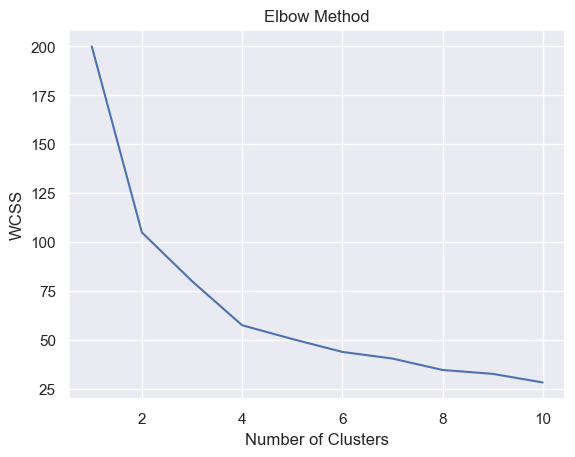

In [59]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [60]:
# building Algorithm 
clusters_new = KMeans(n_clusters=4,random_state=16)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=16)

In [61]:
clusters_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [62]:
# Assign clusters to data set
data["n_clusterid"]=clusters_new.labels_
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [63]:
data.groupby("n_clusterid").agg(["mean"]).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15228\877112223.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby("n_clusterid").agg(["mean"]).reset_index()


,n_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


In [64]:
data[data["n_clusterid"]==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,n_clusterid
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


## DBSCAN Clustering

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [66]:
data = pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [67]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [68]:
array = data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [69]:
#normalizing 
scalar = StandardScaler().fit(array)
scaled_data_df = scaler.transform(array)
scaled_data_df

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [70]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

neighbors = NearestNeighbors(n_neighbors=6)
fitneighbors = neighbors.fit(scaled_data_df)
distances, indices = fitneighbors.kneighbors(scaled_data_df)

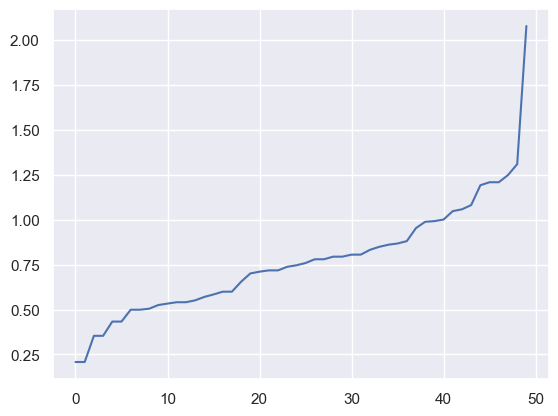

In [71]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [72]:
#model building 
dbscan = DBSCAN(eps=1.2,min_samples=4)
dbscan.fit(scaled_data_df)

DBSCAN(eps=1.2, min_samples=4)

In [73]:
dbscan.labels_

array([ 0, -1,  1,  1, -1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [74]:
cl = pd.DataFrame(dbscan.labels_,columns=["Clusters"])
cl

,Clusters
0,0
1,-1
2,1
3,1
4,-1
5,-1
6,1
7,1
8,-1
9,0


In [75]:
import sklearn
sklearn.metrics.silhouette_score(scaled_data_df,dbscan.labels_)

0.2677430171383357

In [76]:
pd.concat([data,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0
